In [3]:
using Plots, DifferentialEquations

# Análisis cualitativo de la dinámica del modelo

*Parámetros a utilizar:*
- $r$: Tasa de crecimiento intrínseco de la población de presas
- $K$: Capacidad de soporte del medio ambiente
- $m$: Tasa de mortalidad natural de la especie depredadora
- $b$: Eficiencia de conversión
- $a$: Eficiencia de búsqueda del depredador
- $q_1$: Coeficiente de capturabilidad de la especie presa
- $q_2$: Coeficiente de capturabilidad de la especie depredadora

La dinámica del modelo está dada por

$$
\begin{cases}
    \dot x = rx(1-\frac{x}{K}) - axy-q_1xE\\
    \dot y = abxy-my-q_2yE
\end{cases}
$$
para analizar el comportamiento del sistema, consideramos que el control cumple $E(t) \equiv E$

In [ ]:
# Consideramos p vector de parámetros
# p = [r K m b a q_1 q_2 E]

# Función para usar con DifferentialEquations
function fish!(du, u, p, t)
    du[1] = p[1]*u[1]*(1-u[1]/p[2]) - p[5]*u[1]*u[2] - p[6]*u[1]*p[8]
    du[2] = p[5]*p[4]*u[1]*u[2] - p[3]*u[2] - p[7]*u[2]*p[8]
end

# Función para plotear usando VectorFieldPlots
function fish(x,y,p)
    out = zeros(2)
    out[1] = p[1]*x*(1-x/p[2]) - p[5]*x*y - p[6]*x*p[8]
    out[2] = p[5]*p[4]*x*y - p[3]*y - p[7]*y*p[8]
    return out
end

fish (generic function with 1 method)

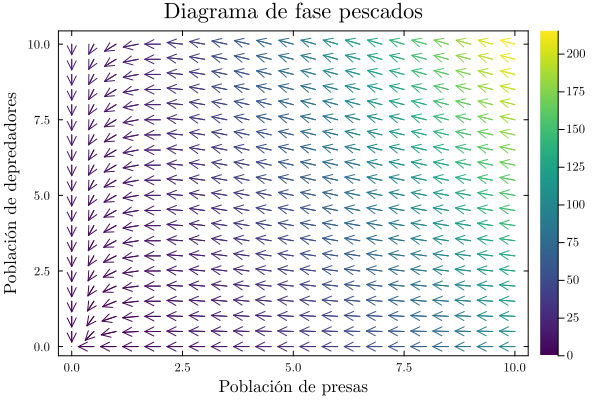

In [ ]:
using VectorFieldPlots, LaTeXStrings
default(grid=false, framestyle=:box, label="", fontfamily="Computer Modern")
# Definición de parámetros
params1 = [1 1 1 1 1 1 1 1]

# Definir campo a plotear
f(x,y) = fish(x,y,params1)
xs = 0:0.5:10
ys = 0:0.5:10


fig = plot_vector_field(xs, ys, f, scale=0.35)
xlabel!("Población de presas")
ylabel!("Población de depredadores")
title!("Diagrama de fase pescados")

In [26]:
params1 = [1 1 1 1 1 1 1 1]
x0 = [10,1]
problem1 = ODEProblem(fish!, x0, (0, 10),params1)
sol = solve(problem1)

retcode: Success
Interpolation: 3rd order Hermite
t: 30-element Vector{Float64}:
  0.0
  0.03622507638666755
  0.06113857160994454
  0.10584100128337062
  0.15170970283698743
  0.21630695020250074
  0.29208985195048043
  0.39067422822390996
  0.5115809744463269
  0.6641855186638509
  0.8494422175864064
  1.0744228006293963
  1.3464834352378736
  ⋮
  3.5672891830856783
  3.9866370575953822
  4.41599668071647
  4.857604850714005
  5.316722898668894
  5.803072811322087
  6.3302417225837555
  6.915488324051835
  7.580685855809685
  8.355444655312489
  9.28258323318658
 10.0
u: 30-element Vector{Vector{Float64}}:
 [10.0, 1.0]
 [7.082394525095916, 1.2605071235787435]
 [5.837219695003061, 1.4074220740484271]
 [4.355244982082468, 1.6120220560145597]
 [3.380557140134495, 1.7535923284987498]
 [2.492761583300111, 1.8588032502049892]
 [1.8385521747588718, 1.8787077656086606]
 [1.3149040076744751, 1.7979727567163781]
 [0.935145862224286, 1.6141530952010144]
 [0.6619913280446074, 1.3410317415842328]

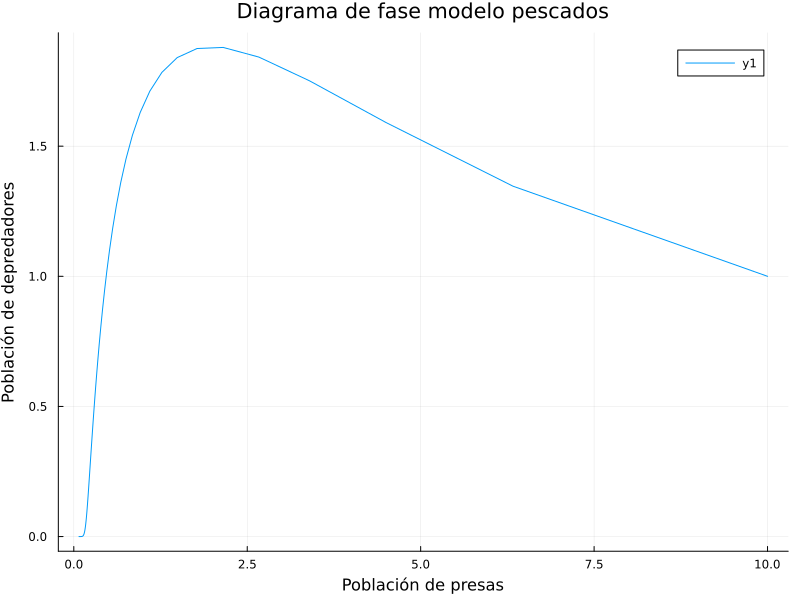

In [27]:
plot(t->sol(t)[1], t->sol(t)[2], 0, 10, size=(800,600))
title!("Diagrama de fase modelo pescados")
xlabel!("Población de presas")
ylabel!("Población de depredadores")